In [1]:
from __future__ import print_function 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df=pd.read_csv("Mall_Customers.csv", index_col='CustomerID')

In [3]:
df.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [5]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.isna().sum()
# Lọc dữ liệu xem có bạn nào null ko?
# Fortunately là ko có dữ liệu null

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

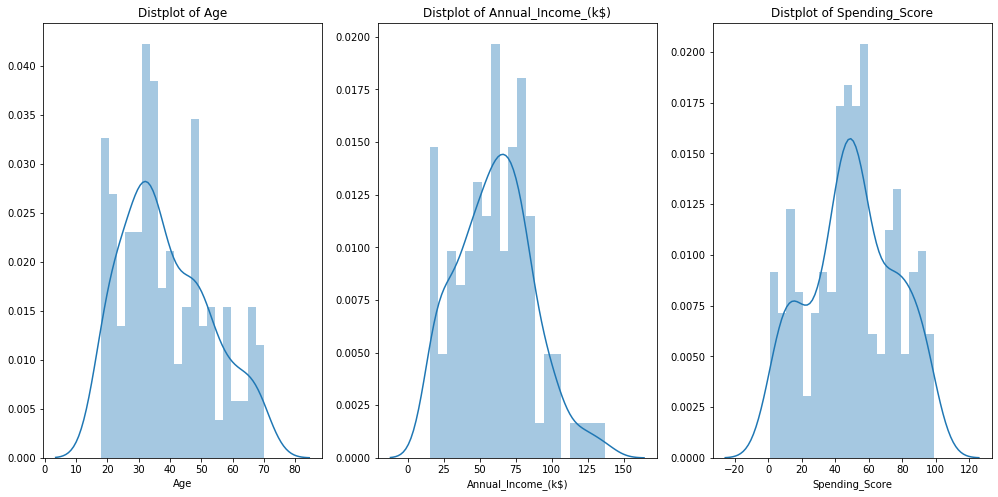

In [6]:
plt.figure(1 , figsize = (17 , 8))
n = 0 
for x in ['Age' , 'Annual_Income_(k$)' , 'Spending_Score']:
    n += 1
    plt.subplot(1 , 3, n)
    sns.distplot(df[x], bins =20)
    # vẽ biểu đồ phân phối đơn biến
    plt.title('Distplot of {}'.format(x))
plt.show()


In [7]:
X = df.iloc[:, [2, 3]].values
# Lấy ra 2 dimension x, y thôi thì có thể tính khoảng cách cho dễ, trên thực tế nó là n chiều,  

In [8]:
# Sử dụng phương pháp elbow để tìm số lượng clusters- cụm thích hợp
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
# Wcss stands for tổng khoảng cách từ các điểm đến centeroid Within Cluster Sum Of Squares
# Wcss giảm khi Number of Cluster tăng, hence càng hiệu quả 
    wcss.append(kmeans.inertia_)

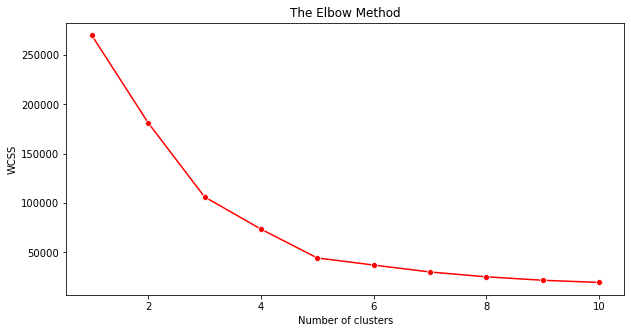

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [20]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 29)
y_kmeans = kmeans.fit_predict(X)

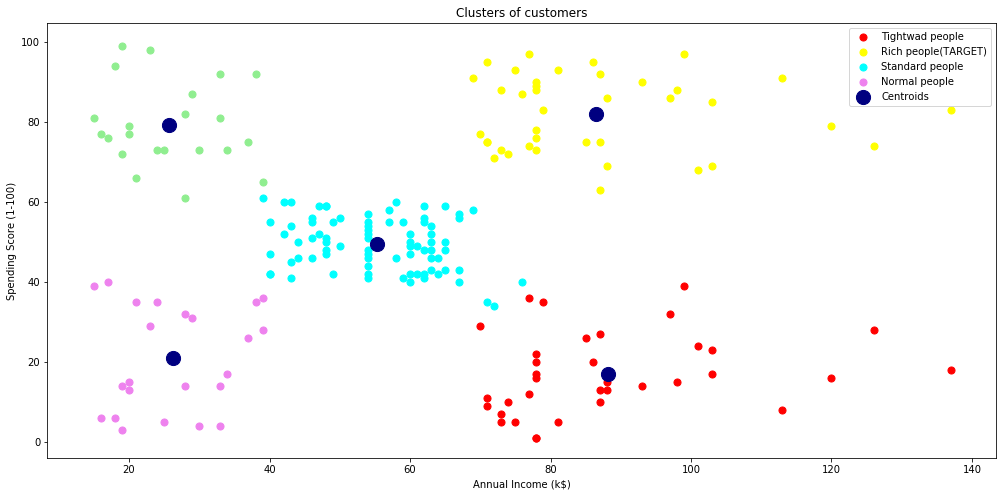

In [21]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Tightwad people')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'yellow', label = 'Rich people(TARGET)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'aqua', label = 'Standard people')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'violet', label = 'Normal people')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'lightgreen')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 50, c = 'pink')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  s = 200, c = 'navy' ,label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

In [12]:
print(X[y_kmeans == 0, 0])

[ 70  71  71  73  73  74  75  77  77  78  78  78  78  78  78  79  81  85
  86  87  87  87  88  88  93  97  98  99 101 103 103 113 120 126 137]
